**Descriptive Analysis**

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import sqrt
import seaborn as sns

path = "/content/data.csv"
df = pd.read_csv(path)
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [6]:
monthlyExpense = df['Mthly_HH_Expense']

1.**The Mean, Median and Mode are as follows:**
1. The mean (average) of a data set is found by adding all numbers in the data set and then dividing by the number of values in the set.$$ Mean = \frac{1}{n} \sum_{i=i}^{n} x_{i} $$
2. The median is the middle value when a data set is ordered from least to greatest.$$Median = l + \frac{[\frac{n}{2} - c]}{f} \times n$$
3. The mode is the number that occurs most often in a data set.$$Mode = l + [\frac{f_{m}-f_{1}}{2f_{m}-f_{1}-f_{2}}]\times h$$

In [9]:
resMean=monthlyExpense.mean()     #Calculate mean
resMedian=monthlyExpense.median() #Calculate median
resMode=monthlyExpense.mode()     #Calculate mode

In [10]:
resMean,resMedian,resMode

(18818.0, 15500.0, 0    25000
 dtype: int64)

2.**Ploting the mean, median and mode in a line chart.**

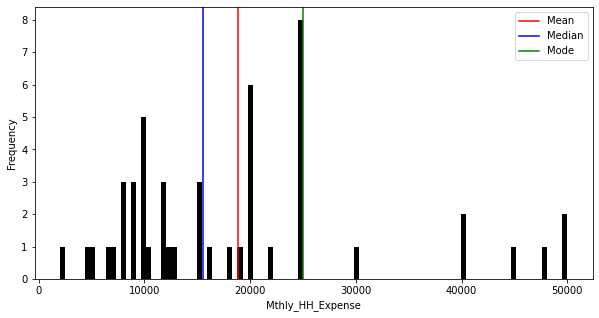

In [13]:
plt.figure(figsize=(10,5))
plt.hist(monthlyExpense,bins=100,color='black')
plt.axvline(resMean,color='red',label='Mean')
plt.axvline(resMedian,color='blue',label='Median')
plt.axvline(resMode[0],color='green',label='Mode')
plt.xlabel('Mthly_HH_Expense')
plt.ylabel('Frequency')
plt.legend()
plt.show()

3. **Variance and Standard Deviation**
Variance is the average squared deviations from the mean, while standard deviation is the square root of this number. Both measures reflect variability in a distribution, but their units differ: Standard deviation is expressed in the same units as the original values (e.g., minutes or meters).

A. **Standard Deviation is as follows:** $$ \sigma = \sqrt {\frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 } } $$

In [15]:
#Standar Deviation
std = sqrt(monthlyExpense.var())
round(std,4)

12090.2168

B.**The variance is calulated as follows:** 
$$ \sigma^2 =  {\frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 } } $$

In [20]:
#Variance 
round(monthlyExpense.var(),4)

146173342.8571

4. **Correlation - Pearson**

The Pearson correlation coefficient is probably the most widely used measure for linear relationships between two normal distributed variables and thus often just called "correlation coefficient". 
$$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$$
And the estimate
$$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$$

                  Mthly_HH_Income  ...  Emi_or_Rent_Amt
Mthly_HH_Income          1.000000  ...         0.036976
Mthly_HH_Expense         0.649215  ...         0.405280
Annual_HH_Income         0.970315  ...         0.002716
Emi_or_Rent_Amt          0.036976  ...         1.000000

[4 rows x 4 columns]


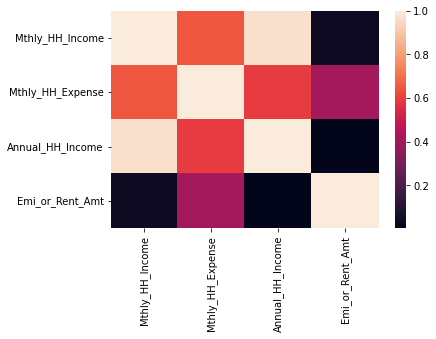

In [21]:
#checking correlation of 4 countinous variables
%matplotlib inline
corelation=df[['Mthly_HH_Income','Mthly_HH_Expense','Annual_HH_Income','Emi_or_Rent_Amt']].corr()
print(corelation)
sns.heatmap(corelation)

5.**Normal Distribution**
A normal distribution in a variate X with mean mu and variance $ \sigma^2$ is a statistic distribution with probability density function
$$P(x)=\frac1{\sqrt{2\pi\sigma^2}}{exp}^\frac{x-\mu}{\sigma}
$$


**Properties of a normal distribution:**

*   The mean, mode and median are all equal.
*   The curve is symmetric at the center (i.e. around the mean, μ).

*   Exactly half of the values are to the left of center and exactly half the values are to the right.
*   The total area under the curve is 1.






**Positively and Neagtively Skewed Distribution**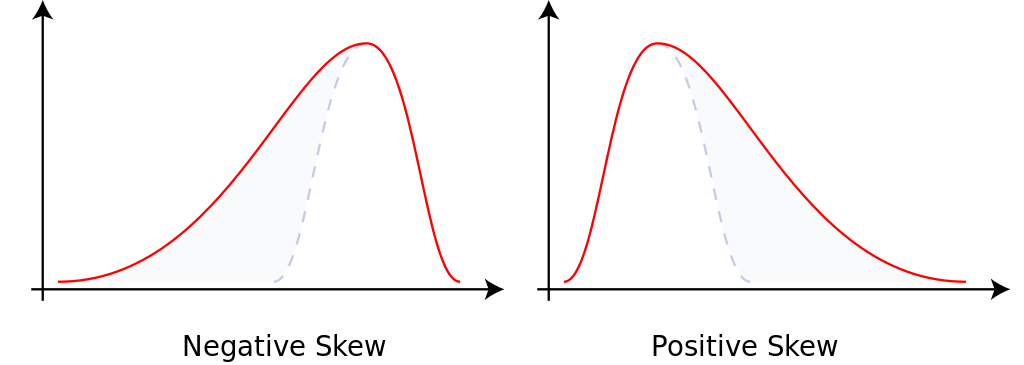

**Note:** To summarize, generally if the distribution of data is skewed to the left, the mean is less than the median, which is often less than the mode. If the distribution of data is skewed to the right, the mode is often less than the median, which is less than the mean.

In [41]:
new = np.asarray(monthlyExpense)
new=sorted(new)

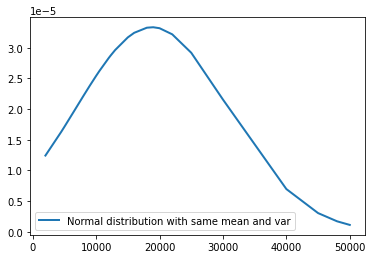

In [48]:
fit = stats.norm.pdf(new, np.mean(new), np.std(new))
#plot both series on the histogram
plt.plot(new,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
#plt.hist(new,density=True,bins = 10,label="Actual distribution")
plt.legend()
plt.show()

6.**Box Cox Transformation**
A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.
\begin{aligned} \psi(y, \lambda) = \begin{cases} \dfrac{y^\lambda - 1}{\lambda} &\lambda \neq 0, \\ \log y &\lambda = 0. \end{cases} \end{aligned}

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.18883043817938627


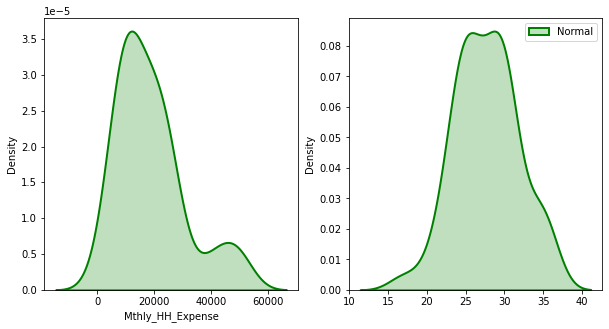

In [51]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(monthlyExpense)

fig, ax = plt.subplots(1, 2) #creating axes to draw plots

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(monthlyExpense, hist = False, kde = True,
kde_kws = {'shade': True, 'linewidth': 2},label ="Non-Normal", color ="green", ax = ax[0])
sns.distplot(fitted_data, hist = False, kde = True,
kde_kws = {'shade': True, 'linewidth': 2},label ="Normal", color ="green", ax = ax[1])

plt.legend(loc = "upper right") #adding legends to the subplots

fig.set_figheight(5) #rescaling the subplots
fig.set_figwidth(10)
print(f"Lambda value used for Transformation: {fitted_lambda}")

7. **Q-Q Plot for Normal Distribution**
Q Q Plots (Quantile-Quantile plots) are plots of two quantiles against each other. A quantile is a fraction where certain values fall below that quantile. For example, the median is a quantile where 50% of the data fall below that point and 50% lie above it. The purpose of Q Q plots is to find out if two sets of data come from the same distribution. A 45 degree angle is plotted on the Q Q plot; if the two data sets come from a common distribution, the points will fall on that reference line.


Steps are as follows:

1.   Order the items from smallest to largest.
2.   Draw a normal distribution curve.
3. Find the z-value (cut-off point) for each segment in Step 3.
4.  Plot your data set values (Step 1) against your normal distribution cut-off points (Step 3). 


((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 2000,  4500,  5000,  6600,  7000,  8000,  8000,  8000,  9000,
          9000,  9000, 10000, 10000, 10000, 10000, 10000, 10500, 12000,
         12000, 12000, 12300, 13000, 15000, 15000, 15000, 16000, 18000,
         19000, 20000, 20000, 20000, 20000

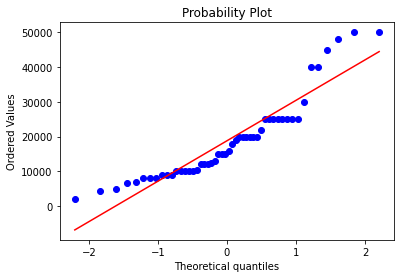

In [59]:
new = np.asarray(monthlyExpense)
new.sort()
stats.probplot(new, dist="norm", plot=plt)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([16.95080742, 20.63204664, 21.15305294, 22.57663001, 22.88804351,
         23.60772736, 23.60772736, 23.60772736, 24.25777242, 24.25777242,
         24.25777242, 24.85163587, 24.85163587, 24.85163587, 24.85163587,
         24.85163587, 25.13066925, 2

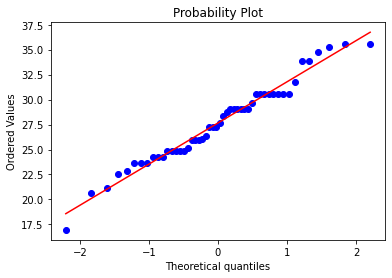

In [60]:
stats.probplot(fitted_data, dist="norm", plot=plt)

*References: *

1.[For search purpose](https://www.google.com)
2.[For Latex Symbols](https://artofproblemsolving.com/wiki/index.php/LaTeX:Symbols)
3.[Statistical formula using latex](https://github.com/rasbt/pattern_classification/blob/master/resources/latex_equations.md#min-max-scaling)
4.[For Complex Problem Reference](https://www.geeksforgeeks.com)